<a href="https://colab.research.google.com/github/mhamed-jammoul/chatle/blob/main/gan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
# from torch_two_sample.statistics_diff import MMDStatistic
import torch

import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from IPython import display
from tqdm import tqdm
from shutil import copyfile


## **Data preprocessing**

In [ ]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


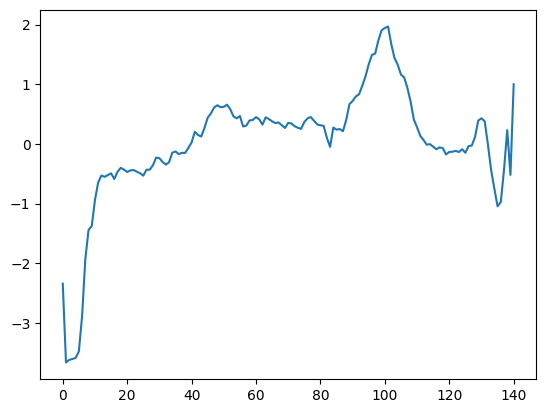

In [ ]:
plt.plot(df.iloc[45])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [ ]:
(df.count()!= 4998).unique()

array([False])

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [ ]:
by_label  = df.groupby(140).count()
by_label.unstack(0)[0]

140
0.0    2079
1.0    2919
dtype: int64

In [ ]:
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
# print(labels.shape)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 123)
print('train data shape: ', train_data.shape)
print('test data shape: ', test_data.shape)
print('train labels shape: ', train_labels.shape)
print('test labels shape: ', test_labels.shape)

train data shape:  (3998, 140)
test data shape:  (1000, 140)
train labels shape:  (3998,)
test labels shape:  (1000,)


In [ ]:
#Now lets Normalize the data -1 1
# Calculate the minimum and maximum values from the training set
data_min = tf.reduce_min(train_data)
data_max = tf.reduce_max(train_data)

# Normalize the training data to the range [-1, 1]
train_data = (train_data - data_min) / (data_max - data_min) * 2 - 1

# Normalize the test data using the same minimum and maximum values
test_data = (test_data - data_min) / (data_max - data_min) * 2 - 1

# Cast the normalized data to the tf.float32 data type
train_data_float = tf.cast(train_data, dtype=tf.float32)
test_data_float = tf.cast(test_data, dtype=tf.float32)


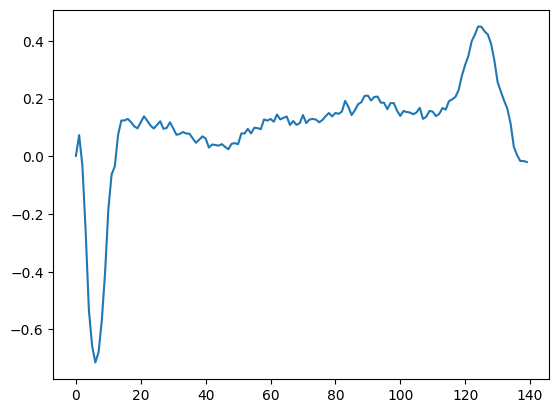

In [ ]:
normal_ecg = train_data[5]
plt.plot(normal_ecg)

In [ ]:
#The labels are either 0 or 1, so I will convert them into boolean
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]


#transforming to tensorflow.float type
normal_train_data_float = tf.cast(normal_train_data, dtype=tf.float32)
normal_test_data_float = tf.cast(normal_test_data, dtype=tf.float32)

#transforming to pd.dataframe:
normal_train_data_df = pd.DataFrame(normal_train_data, columns = df.columns[0:140])
normal_test_data_df = pd.DataFrame(normal_test_data, columns = df.columns[0:140])

#shapes
print('normal train data df shape: ', normal_train_data_df.shape)
print('normal test data df shape: ', normal_test_data_df.shape)

#Abnormal ECG data

abnormal_train_data = train_data[~train_labels]
abnormal_test_data = test_data[~test_labels]

#transforming to tensorflow.float type
abnormal_train_data_float = tf.cast(abnormal_train_data, dtype=tf.float32)
abnormal_test_data_float = tf.cast(abnormal_test_data, dtype=tf.float32)

#transforming to pd.dataframe:
abnormal_train_data_df = pd.DataFrame(abnormal_train_data, columns = df.columns[0:140])
abnormal_test_data_df = pd.DataFrame(abnormal_test_data, columns = df.columns[0:140])

#shapes
print('abnormal train data df shape: ', abnormal_train_data_df.shape)
print('abnormal test data df shape: ', abnormal_test_data_df.shape)




normal train data df shape:  (2323, 140)
normal test data df shape:  (596, 140)
abnormal train data df shape:  (1675, 140)
abnormal test data df shape:  (404, 140)


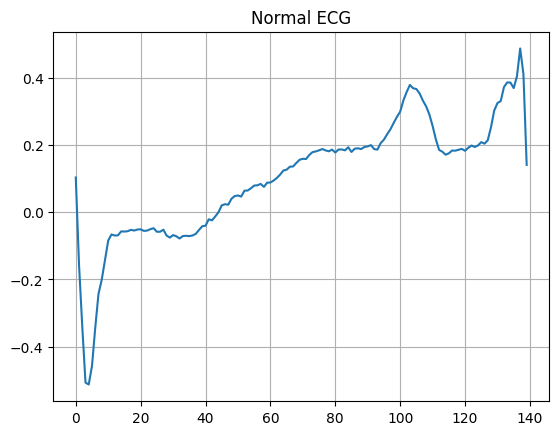

In [ ]:
#Lets plot a normal ECG
normal_ecg = normal_train_data[0]
plt.plot(np.arange(140), normal_ecg)
plt.grid()
plt.title('Normal ECG')
plt.show()

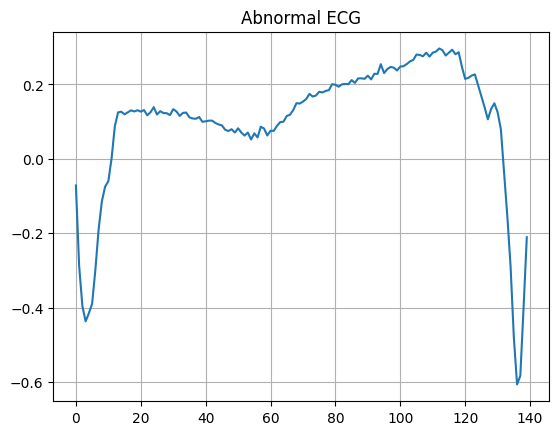

In [ ]:
#Lets plot one from abnormal ECG
abnormal_ecg = abnormal_train_data[0]
plt.plot(np.arange(140),abnormal_ecg )
plt.grid()
plt.title('Abnormal ECG')
plt.show()

# **model**

In [ ]:
# the generator 

import tensorflow as tf
from tensorflow.keras import layers

def make_generator_model():
    model = tf.keras.Sequential()
    
    # Dense layer with more neurons
    model.add(layers.Dense(100*140, activation="relu", input_dim=140))
    
    # Reshape layer
    model.add(layers.Reshape((140, 100)))
    
    # LSTM layers
    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    
    # Conv1DTranspose layers with skip connections
    model.add(layers.Conv1DTranspose(filters=1, kernel_size=16, strides=1, padding="same", activation="relu"))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv1DTranspose(filters=1, kernel_size=16, strides=1, padding="same", activation="relu"))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv1DTranspose(filters=1, kernel_size=16, strides=1, padding="same", activation="tanh"))
    
    return model


import tensorflow as tf
from tensorflow.keras import layers

def make_discriminator_model():
    model = tf.keras.Sequential()
    
    # Conv1D layers
    model.add(layers.Conv1D(filters=32, kernel_size=16, strides=1, padding="same", input_shape=(140, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv1D(filters=64, kernel_size=16, strides=1, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv1D(filters=128, kernel_size=16, strides=1, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv1D(filters=256, kernel_size=16, strides=1, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.3))
    
    # Flatten and dense layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

generator.summary()
discriminator.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14000)             1974000   
                                                                 
 reshape (Reshape)           (None, 140, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 140, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 128)         98816     
 nal)                                                            
                                                                 
 conv1d_transpose (Conv1DTra  (None, 140, 1)           2049      
 nspose)                                                         
                                                        

In [ ]:
def generate_noise(batch_size, noise_dim):
    """
    Generates random noise of shape (batch_size, noise_dim) between -1 and 1.
    """
    return tf.random.uniform([batch_size, noise_dim], minval=-1, maxval=1)


def generate_fake_signals(generator, noise):
    """
    Generates synthetic ECG signals from random noise using the generator model.
    """
    return generator(noise)

In [ ]:
# Define the loss function for the generator
def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)

# Define the loss function for the discriminator
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [ ]:
def train_gan(generator, discriminator, noise_dim, train_dataset, epochs, batch_size, generator_optimizer, discriminator_optimizer):
    for epoch in range(epochs):
        for batch in train_dataset:
            # Train discriminator
            with tf.GradientTape() as disc_tape:
                real_signals = batch
                noise = tf.random.normal([batch_size, noise_dim])
                generated_signals = generator(noise)
                real_output = discriminator(real_signals)
                generated_output = discriminator(generated_signals)
                disc_loss = discriminator_loss(real_output, generated_output)

            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

            # Train generator
            with tf.GradientTape() as gen_tape:
                noise = tf.random.normal([batch_size, noise_dim])
                generated_signals = generator(noise)
                generated_output = discriminator(generated_signals)
                gen_loss = generator_loss(generated_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

        print("Epoch:", epoch + 1, "Generator Loss:", gen_loss.numpy(), "Discriminator Loss:", disc_loss.numpy())


In [ ]:
generator_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
discriminator_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)

# Set the noise dimension
noise_dim = 140
seq_length = 140
# Define the number of epochs and batch size
EPOCHS = 10
BATCH_SIZE = 150
# Prepare the data
dim = (noise_dim,)


In [ ]:
def prepare_data(dim , train_dataset , test_dataset):
    # Batch and shuffle the data
    train_size = train_dataset.shape[0]
    test_size  = test_dataset.shape[0]
    train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset).shuffle(train_size).batch(BATCH_SIZE)
    test_dataset  = tf.data.Dataset.from_tensor_slices(test_dataset).shuffle(test_size).batch(1)

    seed = tf.random.uniform(dim, minval=-1, maxval=1, dtype=tf.float32)

    # Reshape signals to match the discriminator input shape
    return seed ,train_dataset , test_dataset


In [ ]:
seed , train_dataset , test_dataset = prepare_data(dim,normal_train_data_df , normal_test_data_df)

In [ ]:
train_dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 140), dtype=tf.float64, name=None)>

In [ ]:
train_gan(generator, discriminator, noise_dim, train_dataset, EPOCHS, BATCH_SIZE, generator_optimizer, discriminator_optimizer)


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch: 1 Generator Loss: 0.73409545 Discriminator Loss: 0.782107
Epoch: 2 Generator Loss: 1.079029 Discriminator Loss: 0.44928715
Epoch: 3 Generator Loss: 2.6064394 Discriminator Loss: 0.08917365
Epoch: 4 Generator Loss: 4.240108 Discriminator Loss: 0.017449118
Epoch: 5 Generator Loss: 5.395424 Discriminator Loss: 0.0051309643
Epoch: 6 Generator Loss: 6.253116 Discriminator Loss: 0.0026383717
Epoch: 7 Generator Loss: 6.981924 Discriminator Loss: 0.0010682266
Epoch: 8 Generator Loss: 7.5368166 Discriminator Loss: 0.00066927
Epoch: 9 Generator Loss: 8.111675 Discriminator Loss: 0.000447564
Epoch: 10 Generator Loss: 8.590015 Discriminator Loss: 0.0002797728


In [ ]:
generator.save('generator_healthy.h5')
model = tf.keras.models.load_model('generator_healthy.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14000)             1974000   
                                                                 
 reshape (Reshape)           (None, 140, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 140, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 128)         98816     
 nal)                                                            
                                                                 
 conv1d_transpose (Conv1DTra  (None, 140, 1)           2049      
 nspose)                                                         
                                                        

In [ ]:
# 

In [ ]:
noise = np.random.normal(0, 1, (10, noise_dim))
normalized_noise = 2 * noise - 1
synthetic_data = model.predict(normalized_noise)

# Print the shape of the generated data
print(synthetic_data.shape)

1/1 [==============================] - 2s 2s/step
(10, 140, 1)


In [ ]:
seed = tf.random.normal([1, 140, 1])
normalized_seed = 2 * seed - 1

ecg = model(normalized_seed, training=False)
generated_normal_ecg = ecg.numpy().reshape(140, 1)


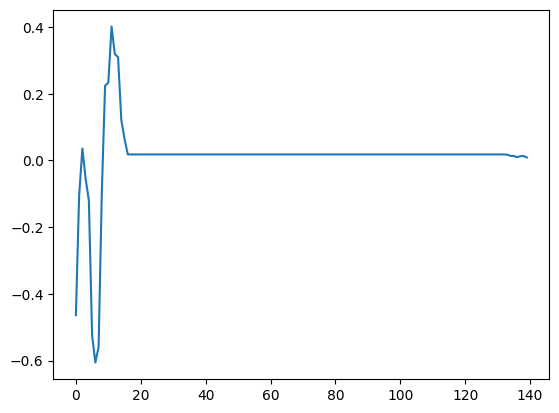

In [ ]:
plt.plot(generated_normal_ecg)


# **Testing**

In [ ]:
def rmse(targets, predictions):
    targets = targets.numpy()
    predictions = predictions.numpy()
    return np.sqrt(np.mean((targets-predictions)**2))


def prd(targets, predictions):
    targets = targets.numpy()
    predictions = predictions.numpy()
    s1 = np.sum((targets-predictions)**2)
    s2 = np.sum(targets**2)
    return np.sqrt(s1 / s2 * 100)


# def mmd(targets, predictions):
#     mmd_stat = MMDStatistic(400, 400)
#     sample_target = torch.from_numpy(targets.numpy().reshape((400,1)))
#     sample_pred = torch.from_numpy(predictions.numpy().reshape((400,1)))
    
#     stat = mmd_stat(sample_target, sample_pred, [1.])
#     return(stat.item())


def testing(test_dataset, model, noise_dim):
    # print(train_dataset.element_spec.shape)
    # print(noise_dim)
    noise = tf.random.normal(noise_dim , dtype=tf.double)
    generated_ecgs = model(noise, training=False)
    # print(generated_ecgs.shape)
    mmd_sum, prd_sum, rmse_sum = [], [], []
    for true_ecg, gen_ecg in zip(test_dataset, generated_ecgs):
        prd_sum.append(prd(true_ecg[0], gen_ecg))
        rmse_sum.append(rmse(true_ecg[0], gen_ecg))
        # mmd_sum.append(mmd(true_ecg[0][0], gen_ecg[0]))

    # print('mmd :', f'mean={np.mean(mmd_sum):.6f}', f'min={np.min(mmd_sum):.6f}', f'max={np.max(mmd_sum):.6f}')
    print('prd :', f'mean={np.mean(prd_sum):.4f}', f'min={np.min(prd_sum):.4f}', f'max={np.max(prd_sum):.4f}')
    print('rmse:', f'mean={np.mean(rmse_sum):.4f}', f'min={np.min(rmse_sum):.4f}', f'max={np.max(rmse_sum):.4f}')

In [ ]:
testing(test_dataset, model, [200,140])

prd : mean=127.7351 min=125.9296 max=129.5514
rmse: mean=0.2234 min=0.2203 max=0.2266


# **Abnormal Data**

In [ ]:
seed_abnormal , train_dataset_abnormal , test_dataset_abnormal = prepare_data(dim,abnormal_train_data_df , abnormal_test_data_df)

In [ ]:
train_gan(generator, discriminator, noise_dim, train_dataset_abnormal, EPOCHS, BATCH_SIZE, generator_optimizer, discriminator_optimizer)


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch: 1 Generator Loss: 7.855767 Discriminator Loss: 0.000421235
Epoch: 2 Generator Loss: 8.082632 Discriminator Loss: 0.0003429133
Epoch: 3 Generator Loss: 8.143329 Discriminator Loss: 0.0003225946
Epoch: 4 Generator Loss: 8.216791 Discriminator Loss: 0.000302543
Epoch: 5 Generator Loss: 8.026636 Discriminator Loss: 0.00037334402
Epoch: 6 Generator Loss: 8.532304 Discriminator Loss: 0.00021873268
Epoch: 7 Generator Loss: 8.538481 Discriminator Loss: 0.00021671166
Epoch: 8 Generator Loss: 8.4348 Discriminator Loss: 0.00026428918
Epoch: 9 Generator Loss: 8.57411 Discriminator Loss: 0.0002118137
Epoch: 10 Generator Loss: 8.854643 Discriminator Loss: 0.00015814291


In [ ]:
generator.save('generator_abnormal.h5')
model_abnormal = tf.keras.models.load_model('generator_abnormal.h5')
model_abnormal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14000)             1974000   
                                                                 
 reshape (Reshape)           (None, 140, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 140, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 128)         98816     
 nal)                                                            
                                                                 
 conv1d_transpose (Conv1DTra  (None, 140, 1)           2049      
 nspose)                                                         
                                                        

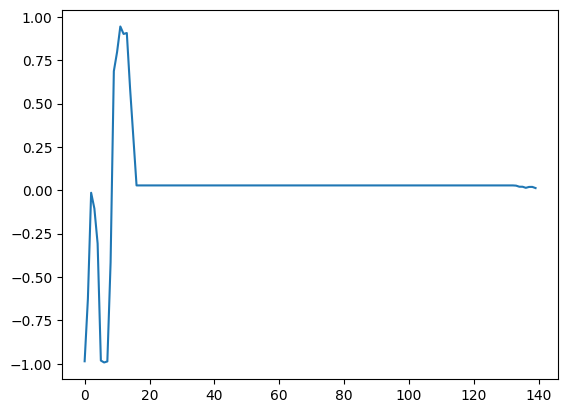

In [ ]:
seed = tf.random.normal([1, 140, 1])
normalized_seed = 2 * seed - 1

ecg = model_abnormal(normalized_seed, training=False)
generated_ecg_abnormal = ecg.numpy().reshape(140, 1)
plt.plot(generated_ecg_abnormal)


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

model_abnormal = tf.keras.models.load_model('generator_abnormal100.h5')
model_normal = tf.keras.models.load_model('Generator.h5')

def generate_ecgs(n, model):
    generated_ecgs = []
    for i in range(n):
        seed = tf.random.normal([1, 140, 1])
        normalized_seed = 2 * seed - 1
        ecg = model(normalized_seed, training=False)
        generated_ecg = ecg.numpy().reshape(140, 1)
        generated_ecgs.append(generated_ecg)
    generated_ecgs = np.array(generated_ecgs).reshape(n, 140)
    df = pd.DataFrame(generated_ecgs)   
    return df


In [ ]:
normal_generated_df = generate_ecgs(normal_train_data_df.shape[0],model_normal)
abnormal_generated_df = generate_ecgs(abnormal_train_data_df.shape[0],model_abnormal)

In [ ]:
abnormal_generated_df = 100*abnormal_generated_df

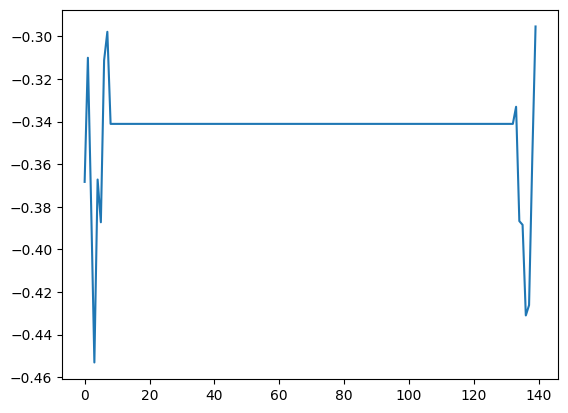

In [ ]:
plt.plot(abnormal_generated_df.iloc[0])

In [ ]:
testing(test_dataset_abnormal, model, [1000,140])

prd : mean=111.6834 min=111.6834 max=111.6834
rmse: mean=0.1954 min=0.1954 max=0.1954


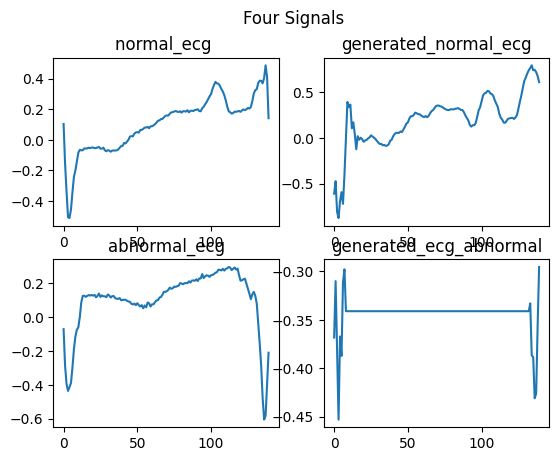

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(nrows=2, ncols=2)

# plot each signal in a different subplot
axs[0, 0].plot(normal_ecg )
axs[0, 0].set_title('normal_ecg ')

axs[0, 1].plot(normal_generated_df.iloc[0])
axs[0, 1].set_title('generated_normal_ecg')

axs[1, 0].plot(abnormal_ecg)
axs[1, 0].set_title('abnormal_ecg')

axs[1, 1].plot(abnormal_generated_df.iloc[0])
axs[1, 1].set_title('generated_ecg_abnormal')

# add a title for the entire figure
fig.suptitle('Four Signals')

# display the figure
plt.show()


# **AutoEncoder**

In [ ]:
from tensorflow.keras.models import Model
class ae16(Model):
  def __init__(self):
    super(ae16, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(64, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(64, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
params16 = {'type_loss': 'mae', 'optimizer':'adam', 'epochs': 20, 'batch_size': 512}


In [ ]:
#Let's compile and train the model!!

autoencoder16 = ae16()
autoencoder16.compile(optimizer = params16['optimizer'], 
                      loss= params16['type_loss'])
history16 = autoencoder16.fit(normal_train_data_df, 
                normal_train_data_df, 
                epochs = params16['epochs'], 
                batch_size=params16['batch_size'], 
                validation_data=(normal_test_data, normal_test_data))

Epoch 1/20
5/5 [==============================] - 3s 51ms/step - loss: 0.3962 - val_loss: 0.3908
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.3856 - val_loss: 0.3735
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 0.3621 - val_loss: 0.3368
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.3149 - val_loss: 0.2705
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.2397 - val_loss: 0.1891
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1683 - val_loss: 0.1448
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1381 - val_loss: 0.1304
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.1257 - val_loss: 0.1191
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1115 - val_loss: 0.1002
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0942 - val_loss: 0.0922
Epoch 11/20
5/5 [============

In [ ]:
normal_train_data_df.shape

(2323, 140)

In [ ]:
# abnormal_train_data_df
# normal_train_data_df
autoencoder16 = ae16()
autoencoder16.compile(optimizer = params16['optimizer'], 
                      loss= params16['type_loss'])

history16 = autoencoder16.fit(normal_train_data_df, 
                normal_train_data_df, 
                epochs = params16['epochs'], 
                batch_size=params16['batch_size'], 
                validation_data=(normal_test_data, normal_test_data))

Epoch 1/20
5/5 [==============================] - 2s 43ms/step - loss: 0.3961 - val_loss: 0.3917
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.3876 - val_loss: 0.3787
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.3703 - val_loss: 0.3523
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.3359 - val_loss: 0.3024
Epoch 5/20
5/5 [==============================] - 0s 15ms/step - loss: 0.2750 - val_loss: 0.2250
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.1953 - val_loss: 0.1569
Epoch 7/20
5/5 [==============================] - 0s 15ms/step - loss: 0.1440 - val_loss: 0.1298
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.1237 - val_loss: 0.1182
Epoch 9/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1147 - val_loss: 0.1109
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1045 - val_loss: 0.0964
Epoch 11/20
5/5 [============

In [ ]:
# predict lal generated normal -> output auto encoder base generator 
reconstructed_data = autoencoder16.predict(normal_test_data)


19/19 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(normal_test_data, reconstructed_data)
print("Mean Squared Error (mae):", mae)

Mean Squared Error (mae): 0.0715265567774174


In [ ]:
reconstructed_gan_data = autoencoder16.predict(normal_generated_df)


73/73 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(normal_test_data, reconstructed_gan_data[:596])
print("Mean Squared Error (MAE):", mae)

Mean Squared Error (MAE): 0.1034915417344578


# **Evaluation Deep Learning**

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X)

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
# Transform your data using the scaler
X_scaled = scaler.transform(X)
# Create a new DataFrame with the scaled data and the label column
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["label"] = y

In [ ]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,label
0,0.131502,-0.193350,-0.651340,-0.720918,-0.734226,-0.465710,-0.217909,-0.184699,-0.019707,0.213349,...,0.382426,0.481632,0.431555,0.370996,0.272203,0.229051,0.238390,0.320707,-0.068444,1.0
1,-0.037506,-0.414661,-0.782725,-0.764104,-0.640200,-0.396413,-0.032888,0.085442,0.152608,0.385441,...,0.311673,0.406982,0.429010,0.409771,0.342318,0.288778,0.381718,0.358417,-0.309936,1.0
2,0.053772,-0.149121,-0.677090,-0.785449,-0.684086,-0.372536,-0.086058,-0.077553,0.003557,0.240915,...,0.408603,0.373139,0.301073,0.210873,0.043674,0.046138,0.281950,0.316621,-0.159583,1.0
3,0.234614,-0.020636,-0.610911,-0.712402,-0.705506,-0.582672,-0.462045,-0.136574,-0.048677,0.051744,...,0.259395,0.364412,0.378722,0.441240,0.435546,0.412392,0.450689,0.413407,-0.153917,1.0
4,0.287583,0.176175,-0.294834,-0.617254,-0.724172,-0.560010,-0.324089,-0.173298,-0.139228,0.122072,...,0.481864,0.488349,0.501975,0.582452,0.512078,0.405216,0.425175,0.454425,0.113606,1.0


In [ ]:
by_label  = df.groupby(140).count()
by_label.unstack(0)[0]

140
0.0    2079
1.0    2919
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Shuffle and split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3998, 140)
y_train shape: (3998,)
X_test shape: (1000, 140)
y_test shape: (1000,)


In [ ]:
# Define your model architecture
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(140,)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
]) 

In [ ]:
# Compile your model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train your model
history = model.fit(X_train, y_train, epochs=10, batch_size=64)


Epoch 1/10
63/63 [==============================] - 1s 3ms/step - loss: 0.1978 - accuracy: 0.9492
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9855
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9892
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9910
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9905
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9915
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9932
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9940
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9935
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9937


In [ ]:
from sklearn.metrics import classification_report
# Evaluate your model on the testing set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       409
         1.0       0.99      1.00      0.99       591

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
model.save("deepLearningModel.h5")


In [ ]:
model = tf.keras.models.load_model('deepLearningModel.h5')


In [ ]:
normal_generated_df['label']=1.0
abnormal_generated_df['label']=0.0

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,label
0,-0.985168,-0.629428,-0.020369,-0.108741,-0.298966,-0.980838,-0.992402,-0.985967,-0.411637,0.675412,...,0.028207,0.028201,0.026914,0.020718,0.020634,0.014389,0.019495,0.019711,0.012926,0.0
1,-0.984587,-0.606973,-0.000666,-0.104097,-0.307090,-0.980904,-0.992481,-0.985960,-0.389896,0.694436,...,0.028207,0.028201,0.026914,0.020718,0.020634,0.014389,0.019495,0.019711,0.012926,0.0
2,-0.985610,-0.631490,-0.028492,-0.108007,-0.298303,-0.981368,-0.992609,-0.986248,-0.417208,0.674377,...,0.028207,0.028201,0.026914,0.020718,0.020634,0.014389,0.019495,0.019711,0.012926,0.0
3,-0.986346,-0.650772,-0.043938,-0.110922,-0.294511,-0.981407,-0.992601,-0.986421,-0.438647,0.657951,...,0.028207,0.028201,0.026914,0.020718,0.020634,0.014389,0.019495,0.019711,0.012926,0.0
4,-0.986095,-0.643604,-0.028438,-0.114004,-0.297201,-0.981609,-0.992799,-0.986679,-0.425427,0.670722,...,0.028207,0.028201,0.026914,0.020718,0.020634,0.014389,0.019495,0.019711,0.012926,0.0


In [ ]:
generated_dataset = pd.concat([normal_generated_df, abnormal_generated_df], ignore_index=True).sample(frac=1).reset_index(drop=True)


In [ ]:
generated_dataset.shape

(3323, 141)

In [ ]:
X_test = generated_dataset.iloc[:,:-1]
y_test = generated_dataset.iloc[:,-1]
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

125/125 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.5810
Test loss: 0.4660, Test accuracy: 0.5810
